**HITARTHI VORA**


### Iris Dataset - Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/content/Iris_dataset.csv',header=0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.shape

(150, 5)

**Since all the features are numerical, we will only convert the Species into a numerical value using Label Encoder.**

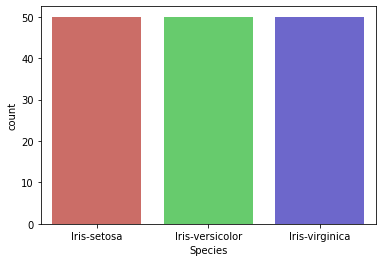

In [5]:
sns.countplot(x='Species',data=df, palette='hls')

In [6]:
label_type=LabelEncoder()
df['Species']=label_type.fit_transform(df['Species'])

In [7]:
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

**As we can see that the Species is converted to numerical value 0, 1 and 2.**

**0 - Iris-setosa, 1 - Iris-versicolor, 2 - Iris-virginica**

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


As we do not need ID column we will drop that column.

In [9]:
df.drop(columns=['Id'],inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**NO MISSING VALUES IN THE DATASET**

**Correlation matrix with features and Species**

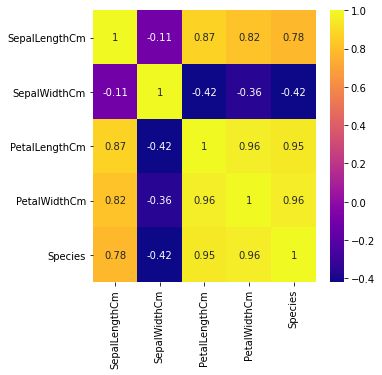

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

**SPLITTING THE DATASET FOR TRAINING AND TESTING**

In [27]:
feature_col = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature_col]
Y = df['Species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
y_train.value_counts()

1    41
0    40
2    39
Name: Species, dtype: int64

**We can see that the training dataset has almost equal number of all the three classes, so it assures that the training dataset is not skewed.**

**TRAINING THE MODEL WITH DECISION TREE CLASSIFIER**

In [40]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [41]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


Predicting the dataset and calculating model accuracy.

In [46]:
y_pred= clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy: ",acc)

Accuracy:  100.0


**With the prediction on the test dataset, we can see we got 100% accuracy.**

**VISUALIZING THE DECISION TREE CLASSIFIER**

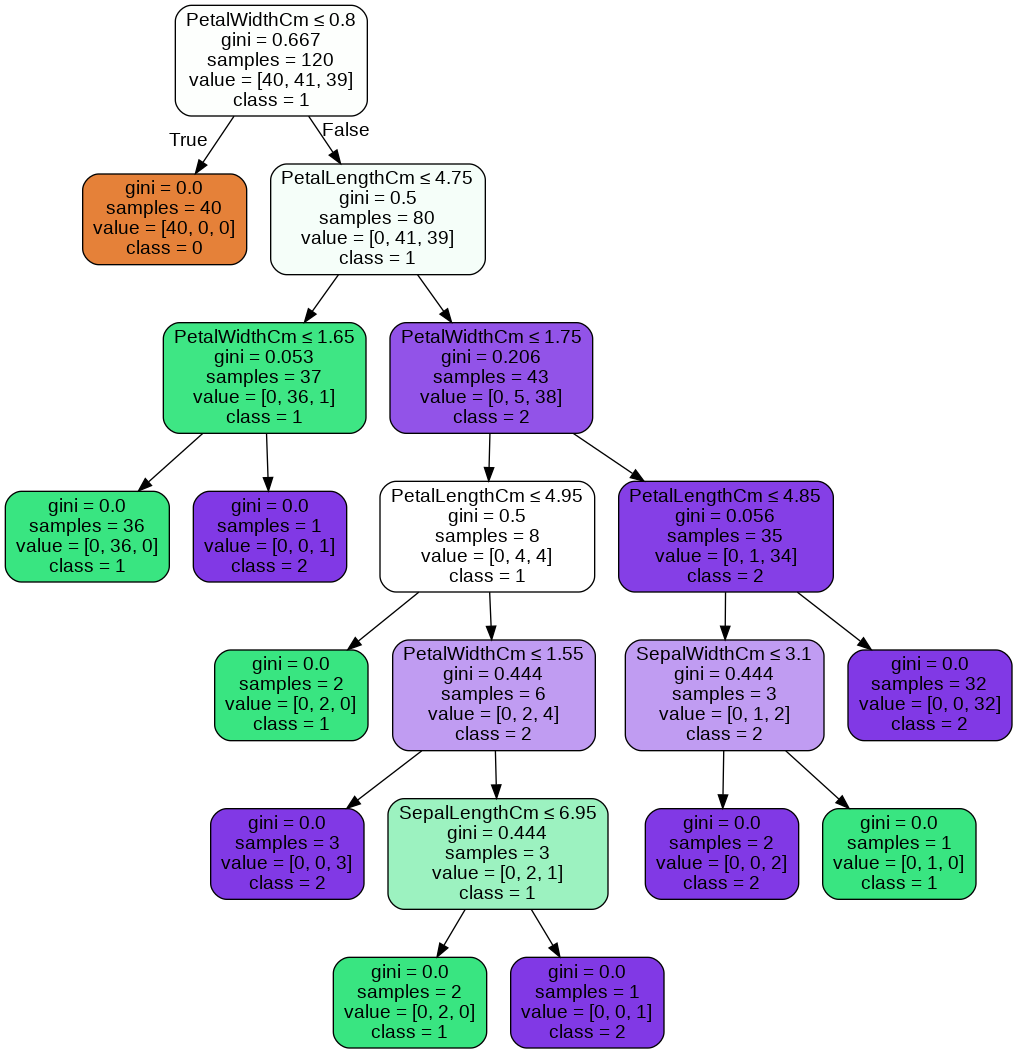

In [47]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())